In [1]:
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from distributions.rv import a
from distributions.continuous import A

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


/Users/aline/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aline/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aline/.pyenv/versions/3.10.6/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[(0.0, 50.0), (0.0, 0.2)]

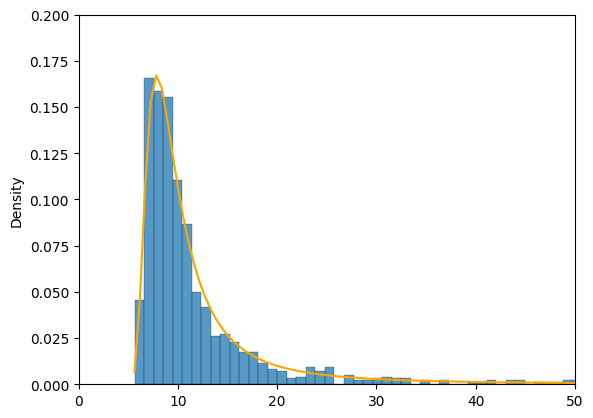

In [2]:
fig, ax = plt.subplots()

beta = 30
samples = pm.draw(A.dist(beta), 1000)
rv = a(beta=beta)

xs = np.linspace(rv.ppf(0.001), rv.ppf(0.99), num=200)
ys = rv.pdf(xs)
sns.histplot(samples, stat="density", ax=ax)
sns.lineplot(x=xs, y=ys, color="orange", ax=ax)
ax.set(xlim=(0, 50), ylim=(0,0.2))

In [3]:
sample = a(beta=beta).rvs(100)

In [4]:
with pm.Model() as model:
    beta = pm.Gamma("beta", 1, 1)
    y = A("y", beta=beta, observed=sample)

In [5]:
with model:
    idata = pm.sample(draws=1000, chains=4, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [beta]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.


In [36]:
model.

[beta ~ Gamma(1, f()), y ~ A(beta)]

array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

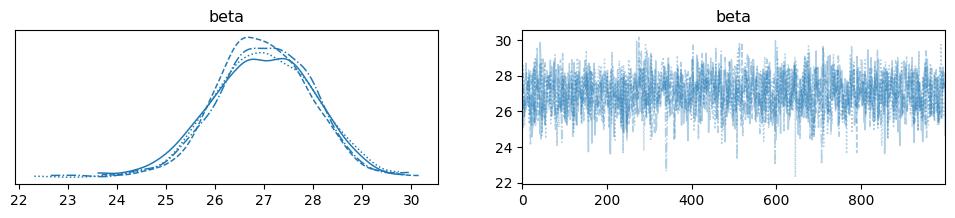

In [6]:
az.plot_trace(idata)

<Axes: title={'center': 'beta'}>

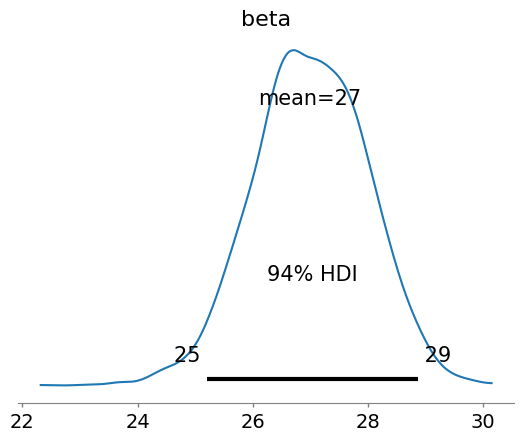

In [7]:
az.plot_posterior(idata)

In [8]:
with model:
    pm.sample_posterior_predictive(idata, extend_inferencedata=True)

Sampling: [y]


Output()

(0.0, 100.0)

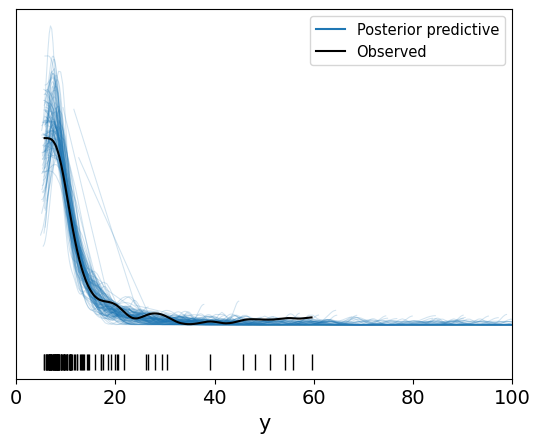

In [9]:
ax = az.plot_ppc(idata, mean=False, observed_rug=True, num_pp_samples=100)
ax.set_xlim(0, 100)